In [3]:
import os
import shutil
import math

import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [5]:
# # Organize data into training and test datasets

data_dir = './dataset'
test_files = []

for x in range(10): # Loop 10 times for each class
    # split images into 8:2
    files = os.listdir(data_dir + "/" + str(x))
    train_files = files[:int(len(files)*0.8)]
    
    train_files_new = [None] * len(train_files)
    path = "./dataset/train" + str(int(x/2)) +  "/" + str(x)
    
    # Create directory if not created
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
        
    # copy to new path
    for y in range(len(train_files)):
        print(data_dir + "/" + str(x) + "/" + train_files[y])
        shutil.copyfile(data_dir + "/" + str(x) + "/" + train_files[y], path + "/" + train_files[y])
    
        
    # same but for test images
    test_files = files[int(len(files)*0.8):len(files)]
    test_files_new = [None] * int(len(test_files)/5)
    
    for y in range(5): # Loop for each dataset
        test_file_dataset = test_files[y*int(len(test_files)/5):(y+1)*int(len(test_files)/5)]
        path = "./dataset/test" + str(y) + "/" + str(x)
        
        # Create directory if not created
        isExist = os.path.exists(path)
        if not isExist:
            os.makedirs(path)
            
        for z in range(len(test_file_dataset)):
            print(data_dir + "/" + str(x) + "/" + test_files[y])
            shutil.copyfile(data_dir + "/" + str(x) + "/" + test_files[z], path + "/" + test_files[z])

./dataset/0/10350.jpg
./dataset/0/27859.jpg
./dataset/0/14039.jpg
./dataset/0/42470.jpg
./dataset/0/18100.jpg
./dataset/0/47992.jpg
./dataset/0/21765.jpg
./dataset/0/37826.jpg
./dataset/0/7659.jpg
./dataset/0/38087.jpg
./dataset/0/48522.jpg
./dataset/0/24629.jpg
./dataset/0/25172.jpg
./dataset/0/27987.jpg
./dataset/0/14053.jpg
./dataset/0/31959.jpg
./dataset/0/27529.jpg
./dataset/0/22265.jpg
./dataset/0/3690.jpg
./dataset/0/39557.jpg
./dataset/0/24637.jpg
./dataset/0/19112.jpg
./dataset/0/2408.jpg
./dataset/0/49921.jpg
./dataset/0/13093.jpg
./dataset/0/47464.jpg
./dataset/0/304.jpg
./dataset/0/41101.jpg
./dataset/0/25281.jpg
./dataset/0/49762.jpg
./dataset/0/21358.jpg
./dataset/0/49898.jpg
./dataset/0/49714.jpg
./dataset/0/11654.jpg
./dataset/0/13421.jpg
./dataset/0/19168.jpg
./dataset/0/28744.jpg
./dataset/0/26780.jpg
./dataset/0/48219.jpg
./dataset/0/37845.jpg
./dataset/0/39189.jpg
./dataset/0/23150.jpg
./dataset/0/20571.jpg
./dataset/0/4184.jpg
./dataset/0/20026.jpg
./dataset/0/6702

##### Check if training dataset is correctly created

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

train_dataset = [None] * 5
test_dataset = [None] * 5
for x in range(5):
    train_dataset[x] = ImageFolder(data_dir+'/train'+str(x), transform=ToTensor())
    test_dataset[x] = ImageFolder(data_dir+'/test'+str(x), transform=ToTensor())

In [7]:
img, label = train_dataset[0][0]
print(img.shape, label)
img, label = test_dataset[0][0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0
torch.Size([3, 32, 32]) 0


In [8]:
print(train_dataset[0].classes)
print(test_dataset[0].classes)

['0', '1']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', train_dataset[0].classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  0 (0)


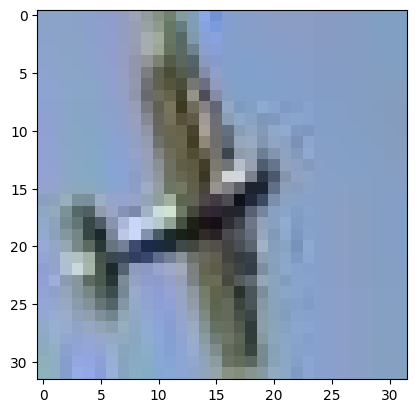

In [10]:
show_example(*train_dataset[0][0])

Label:  0 (0)


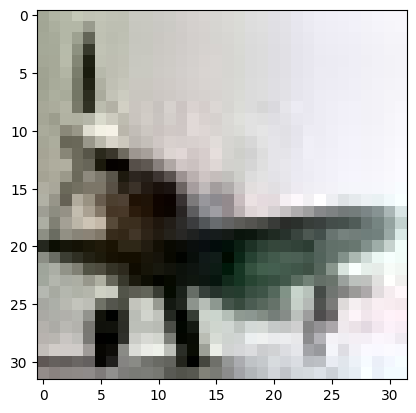

In [11]:
show_example(*test_dataset[0][0])

##### Create validation set 

In [12]:
# Set seed to always create the same validation set
import torch

torch.manual_seed(10)

val_size_ratio = 0.1
val_size = int(len(train_dataset[0]) * val_size_ratio)
val_dataset = [None] * 5

for x in range(5):
    train_size = len(train_dataset[x]) - val_size

    train_dataset[x], val_dataset[x] = random_split(train_dataset[x], [train_size, val_size])
    print(len(train_dataset[x]), len(val_dataset[x]))

8931 992
8923 992
8913 992
8928 992
8941 992


##### Create dataloader object

In [20]:
from torch.utils.data.dataloader import DataLoader

batch_size=8

train_dataload = [None]*5
test_dataload = [None]*5
val_dataload = [None]*5
for x in range(5):
    train_dataload[x] = DataLoader(train_dataset[x], batch_size, shuffle=True, num_workers=2, pin_memory=True)
    test_dataload[x] = DataLoader(test_dataset[x], batch_size, shuffle=True, num_workers=2, pin_memory=True)
    val_dataload[x] = DataLoader(val_dataset[x], batch_size, num_workers=2, pin_memory=True)

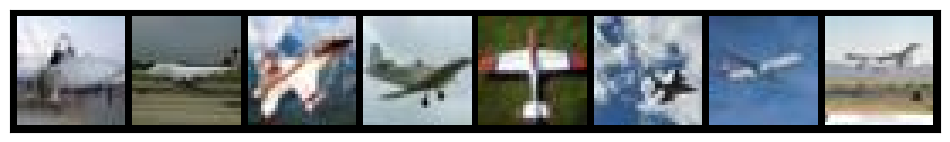

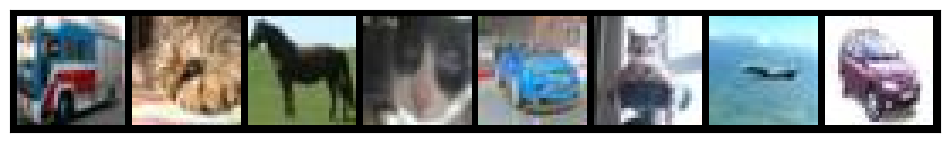

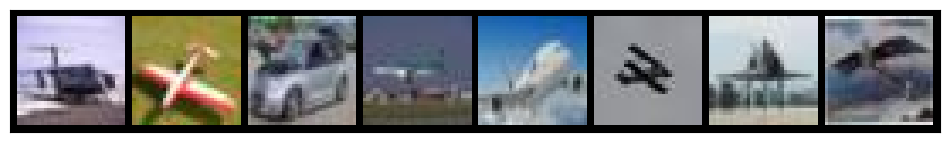

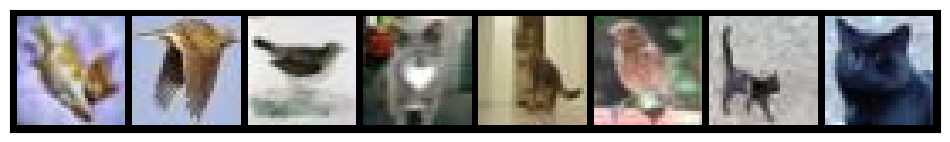

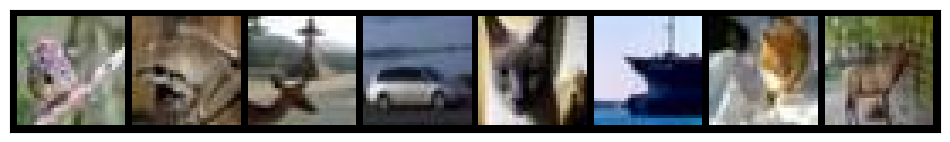

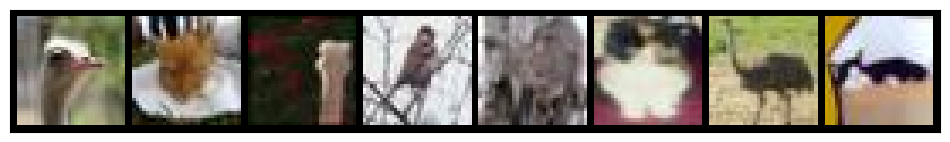

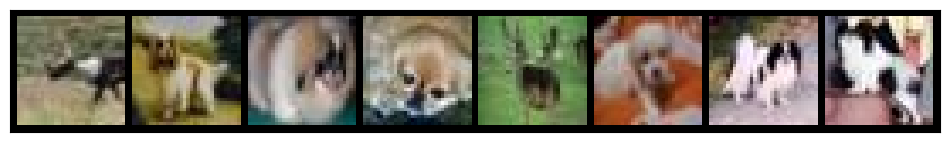

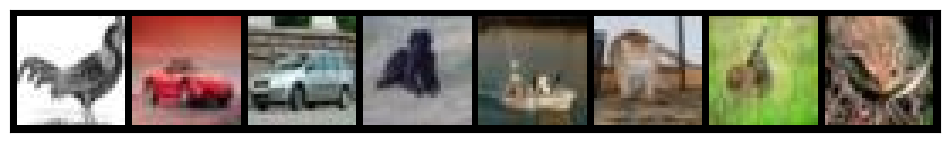

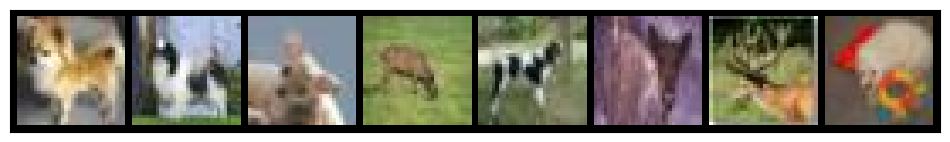

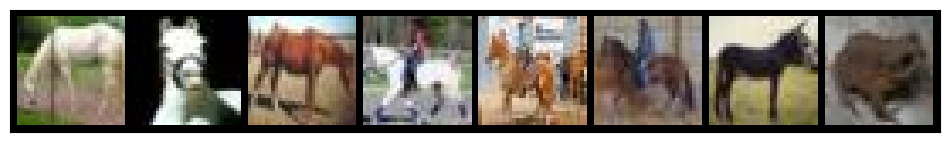

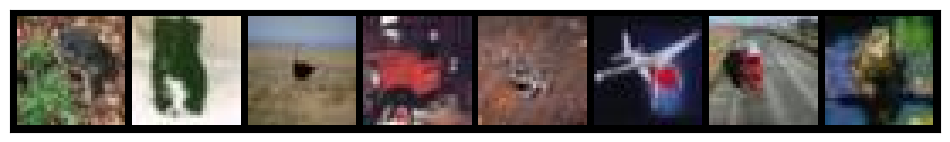

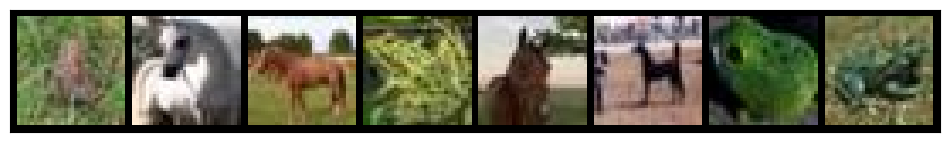

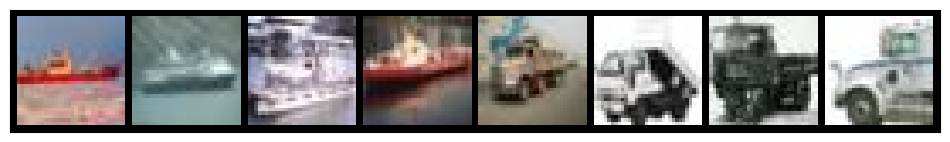

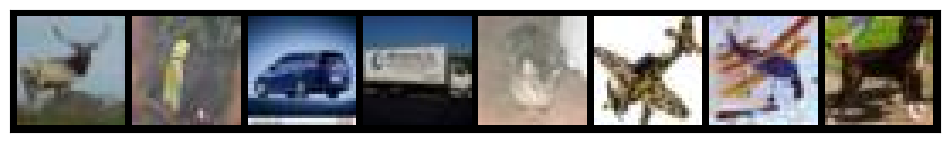

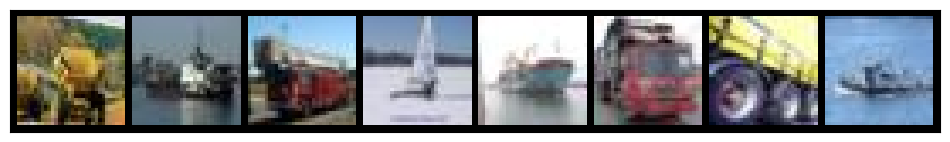

In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

for x in range(5):
    show_batch(train_dataload[x])
    show_batch(test_dataload[x])
    show_batch(val_dataload[x])

In [22]:
# define CNN

import torch.nn as nn
import torch
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=False),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc1 = nn.Linear(32*16*16, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 10)
            
    def forward(self, x):
        x = self.conv(x)

        x = x.view(-1, 32*16*16)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = torch.log_softmax(x, dim=1)
        return x
    
cnn = CNN()
# Set device to GPU
cnn.to(device)

CNN(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=8192, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=10, bias=True)
)

In [23]:
# Define loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

##### Train network

In [24]:
# Train network

def train(dataset_no):
    running_loss = 0.0
    for epoch in range(2):  # loop over the dataset multiple times
        for i, data in enumerate(train_dataload[dataset_no], 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)


            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 100 == 0:    # print every batch size
                print(f'[{dataset_no}, {epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
            # Save model
    PATH = './CNN_model'
    torch.save(cnn.state_dict(), PATH)
    
    print('Finished Training dataset: ' + str(dataset_no))

In [25]:
def test(dataset_no): 
  # Test images

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_dataload[dataset_no]:
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          # calculate outputs by running images through the network
          outputs = cnn(inputs)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct // total} %')

In [26]:
for x in range(5):
    train(x)
    test(x)

[0, 1,     1] loss: 0.001
[0, 1,   101] loss: 0.070
[0, 1,   201] loss: 0.032
[0, 1,   301] loss: 0.024
[0, 1,   401] loss: 0.020
[0, 1,   501] loss: 0.020
[0, 1,   601] loss: 0.017
[0, 1,   701] loss: 0.017
[0, 1,   801] loss: 0.016
[0, 1,   901] loss: 0.016
[0, 1,  1001] loss: 0.014
[0, 1,  1101] loss: 0.014
[0, 2,     1] loss: 0.002
[0, 2,   101] loss: 0.014
[0, 2,   201] loss: 0.011
[0, 2,   301] loss: 0.012
[0, 2,   401] loss: 0.012
[0, 2,   501] loss: 0.011
[0, 2,   601] loss: 0.012
[0, 2,   701] loss: 0.010
[0, 2,   801] loss: 0.012
[0, 2,   901] loss: 0.010
[0, 2,  1001] loss: 0.009
[0, 2,  1101] loss: 0.011
Finished Training dataset: 0
Accuracy of the network on the test images: 18 %
[1, 1,     1] loss: 0.000
[1, 1,   101] loss: 0.037
[1, 1,   201] loss: 0.028
[1, 1,   301] loss: 0.028
[1, 1,   401] loss: 0.027
[1, 1,   501] loss: 0.026
[1, 1,   601] loss: 0.026
[1, 1,   701] loss: 0.026
[1, 1,   801] loss: 0.025
[1, 1,   901] loss: 0.024
[1, 1,  1001] loss: 0.024
[1, 1,  1101